# First steps with the random forest in Scikit-Learn

## 1. Classification with all the features of Iris dataset

Import machine learning libraries

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Import the library to draw the decision tree

### How to install "graphviz"?

1- you must install the python package "graphviz" with the "anaconda navigator" interface or "pip install"

2- you must verify that the graphviz binary package (not the python one) is also installed. The installation procedure is described on https://graphviz.org/download/

In [5]:
# To install the Python graphviz package, you may use "pip" as follows
%pip install graphviz

     |████████████████████████████████| 46 kB 1.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
# install the package python-graphviz
import graphviz 

Load the iris dataset

In [7]:
iris = load_iris()

X = iris.data # attributes
y = iris.target # labels

Print the feature names

In [8]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Print the label names

In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Splitting into train and test sets

**Question 1: what is the percentage of testing data? What is the interest of the seed?**

Complete the sentence:
The goal of the seed is to control how the split is done. For a given seed, you get the same split.

The percentage of testing data is given by the argument "test_size".

In [10]:
# Setting random seed
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, random_state = seed )

In [11]:
import numpy as np
print(np.shape(X))
print(np.shape(X_test))
print(150*0.34)

(150, 4)
(52, 4)
51.00000000000001


Learn a decision tree with the iris dataset

**Question 2: what is the meaning of "min_samples_leaf" in the following cell?**

Complete the sentence:
It corresponds to the minimum number of samples required to split an internal node.

In [12]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=1)
print(clf)

DecisionTreeClassifier()


**Question 3: Train the decision tree.**

Training the decision tree

In [13]:
clf.fit(X_train, y_train) # training the decision tree

DecisionTreeClassifier()

Export the tree into a pdf file

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

Draw the decision tree

**Question 4: Explain the content presented in each note. What does it mean? what is the criterion used to split a node?**

The splitting is based on the Gini index as explained in the lecture.
At each node, we wee :

    - the attribute that is used for the splitting
    
    - the value of the Gini index
    
    - the number of processed samples
    
    - the proportions of the classes
    
    - the class that is decided at this node
    

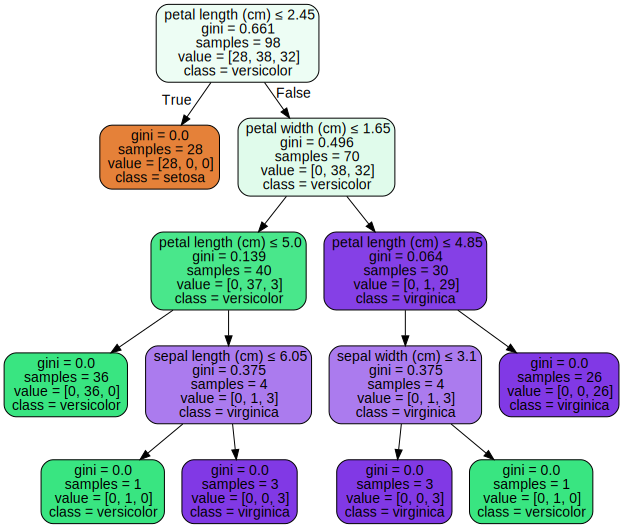

In [15]:
 dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Question 5: Compute the accuracy on the training dataset and the test dataset?.**

Compute the accuracy on the training set

In [16]:
y_train_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print('DecisionTreeClassifier training accuracy score: {}'.format(accuracy))

DecisionTreeClassifier training accuracy score: 1.0


Compute the accuracy on the testing set

In [17]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier test accuracy score: {}'.format(accuracy))

DecisionTreeClassifier test accuracy score: 0.9615384615384616


**Question 6: We observe a gap between the training accuracy and the testing accuracy. What does it mean?**

The gap might be explained by overfitting: the decision tree contains two many nodes.

**Question 7: Propose a simple modification of the code to reduce this gap.**

In [18]:
# We can reduce the depth of the tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train) # training the decision tree
y_train_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9591836734693877
DecisionTreeClassifier accuracy score: 0.9615384615384616


## 2. Classification with only two features of Iris dataset

**We would like to undertand more precisely the behavior of the decision tree.
For this purpose, we want to study the decision regions learned by the decision tree.
Since it is simpler in 2D, we will study only 2 attributes**

Import some libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Study just one pair of attributes

**Question 8: Select only the two attributes 'sepal length (cm)' and 'petal width (cm)'**

In [20]:
pair = [ 0,3]
X_train2D = X_train[:,pair]
X_test2D = X_test[:,pair]

**Question 9: Train the decision tree of the reduced dataset.**

In [21]:
clf2D = tree.DecisionTreeClassifier()
clf2D.fit(X_train2D, y_train) # training the decision tree

DecisionTreeClassifier()

Compute the accuracies for only two attributes

**Question 10: Compute the training and testing accuracies.**

In [22]:
y_train_pred2D = clf2D.predict(X_train2D)
accuracy = accuracy_score(y_train, y_train_pred2D)
print('DecisionTreeClassifier 2D training accuracy score: {}'.format(accuracy))

DecisionTreeClassifier 2D training accuracy score: 0.9795918367346939


In [23]:
y_test_pred2D = clf2D.predict(X_test2D)
accuracy = accuracy_score(y_test, y_test_pred2D)
print('DecisionTreeClassifier 2D test accuracy score: {}'.format(accuracy))

DecisionTreeClassifier 2D test accuracy score: 0.9423076923076923


Plot the decision regions

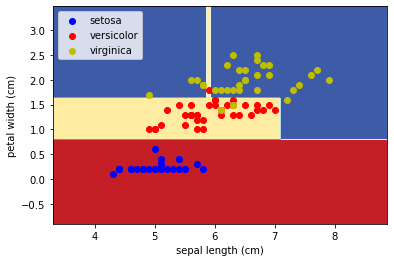

In [24]:
# Parameters
plot_step = 0.02
n_classes = iris.target_names.shape[0]
plot_colors = "bry" # colors assigned to the labels

# Sampling the 2D plane
x_min, x_max = X_train2D[:, 0].min() - 1, X_train2D[:, 0].max() + 1
y_min, y_max = X_train2D[:, 1].min() - 1, X_train2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

# Compute the decisions
Z = clf2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) # reshape as a 2D matrix

# Plot the decision contours
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Change the axis names
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis()
 
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train == i)
    plt.scatter(X_train2D[idx, 0], X_train2D[idx, 1], c=color,
                 label=iris.target_names[i],
                 cmap=plt.cm.RdYlBu)
# Put a legend
plt.legend(loc="upper left")
plt.show()

Draw the decision tree

**Question 11: draw the decision tree. Is it consistent with the decision regions plot above?**

Comment: yes, of course. The decision tree rules are consistent with the decision regions plot.

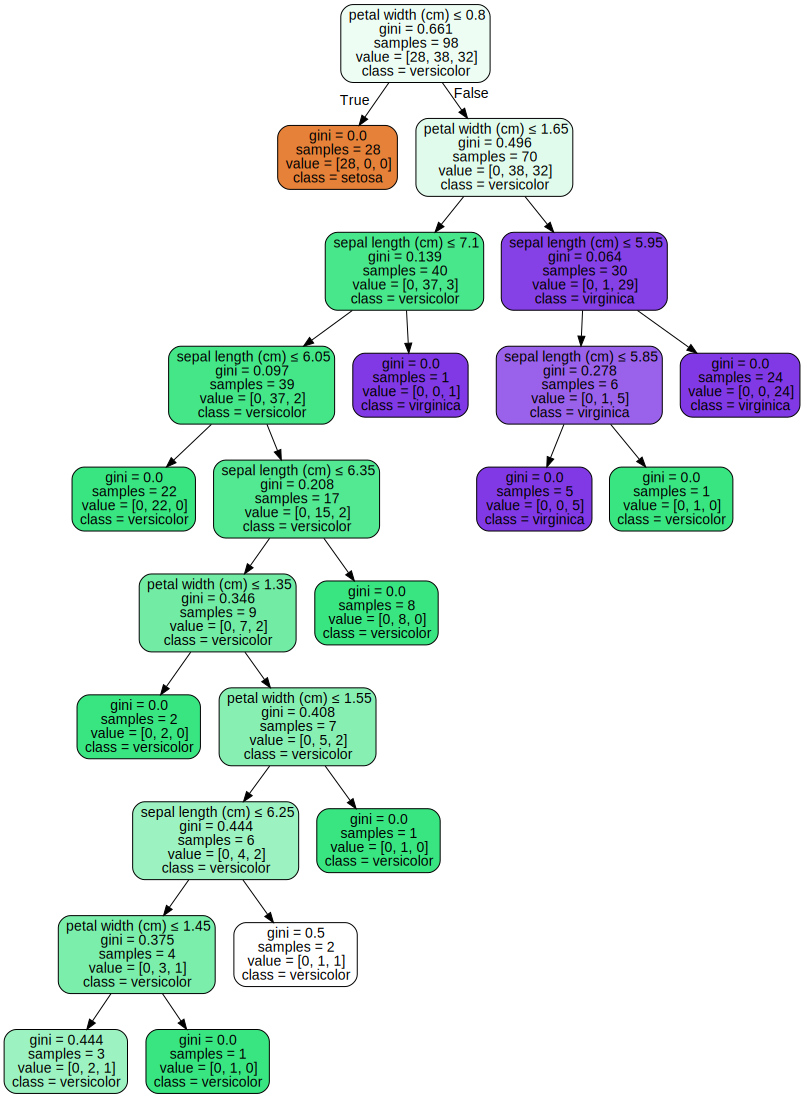

In [25]:
 dot_data = tree.export_graphviz(clf2D, out_file=None, 
                         feature_names=list([iris.feature_names[pair[0]],iris.feature_names[pair[1]]]),  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## 3. Classification with a random forest and all the features

In [26]:
from sklearn.ensemble import RandomForestClassifier

**Question 12: Define a random forest with 30 trees and a maximum depth for each tree equal to 3.**

In [27]:
n_estimators = 30
rf = RandomForestClassifier(n_estimators=n_estimators,max_depth=3)
print(rf)

RandomForestClassifier(max_depth=3, n_estimators=30)


**Question 13: Train the random forest on the training set with all the features.**

In [28]:
rf.fit(X_train, y_train) # training the random forest

RandomForestClassifier(max_depth=3, n_estimators=30)

**Question 14: Compute the training accuracy and the test accuracy of the random forest.**

In [29]:
y_train_pred = rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print('RandomForestClassifier training accuracy score: {}'.format(accuracy_train))

y_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print('RandomForestClassifier test accuracy score: {}'.format(accuracy_test))

RandomForestClassifier training accuracy score: 0.9795918367346939
RandomForestClassifier test accuracy score: 0.9615384615384616


**Final comment:**

To see the advantages of a random forest over a single decision tree, you can run the notebook on the wine dataset provided by sklearn:
    
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine
    
from sklearn.datasets import load_wine

data = load_wine()